# 시작하기 앞서 준비사항
kaggle 계정에서 API token을 발급하여 kaggle.json파일을 사전에 준비해주세요

# Google mediapipe 설치

In [ ]:
!pip install -q mediapipe==0.10.0 # google meidapipe를 이용

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 9.1 MB/s eta 0:00:00


In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

In [ ]:
def draw_landmarks_on_image(rgb_image, detection_result): # 이미지 detection 후 위와 좌표대로 점 찍어주는 함수
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

# 원하는 대로 잘 동작하는지 테스트하기 위해 테스트
둘중 한셀만 진행해주세요

In [ ]:
import cv2  # opencv를 이용해서 이미지 read, show
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive  # colab에 구글 드라이브를 마운트하여 사용할 경우
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()
for filename, content in uploaded.items():
    image_file = filename

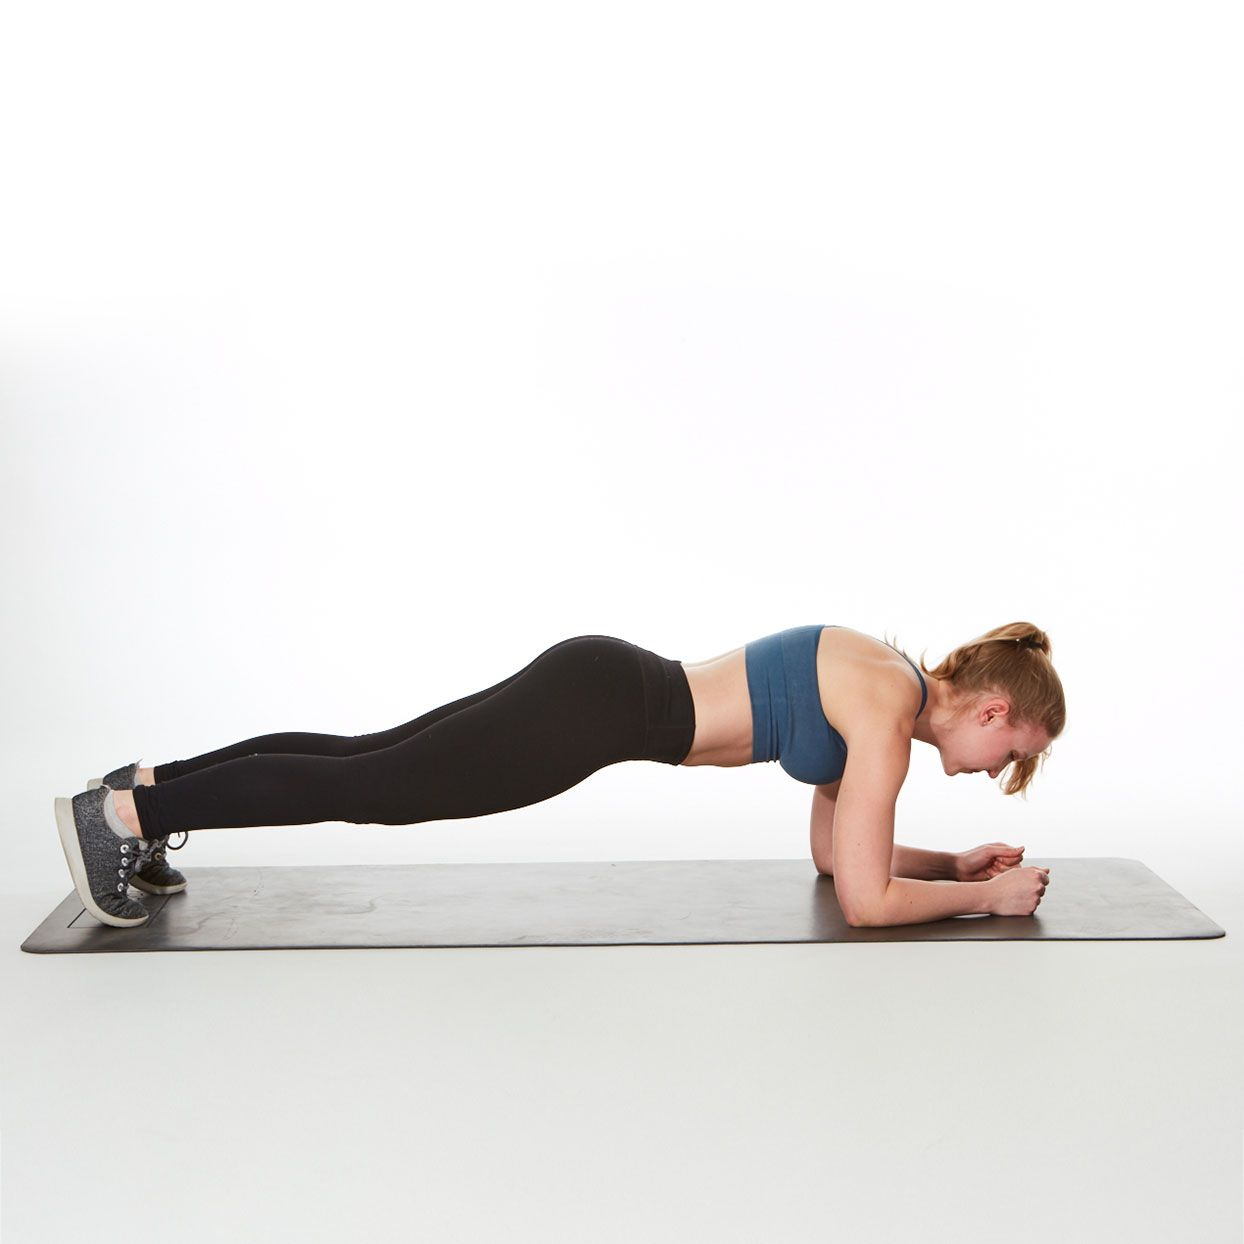

<class 'numpy.ndarray'>


In [ ]:
# img = cv2.imread('./content/drive/MyDrive/otain.jpeg')  # 본인 구글 마운트 경로로 지정
img = cv2.imread(image_file)  # 직접 colab에 업로드했을 경우
cv2_imshow(img)
print(type(img))

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
# image = mp.Image.create_from_file("./drive/MyDrive/otani.jpeg") # 구글 드라이브 내 경로 지정 필요
image = mp.Image.create_from_file(image_file) # 위에서 본인이 업로드한 이미지 파일 사용

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

NameError: ignored

# 필요한 포인트를 좌표로 추출하기 위한 방법

In [ ]:
# 원하는 좌표 추출을 위해서 사용
list = np.zeros(shape=(1,66)) # numpy zeros array 생성 후 특정 좌표에 대해 값을 입력하는 형식으로 인식
for i, landmarks in enumerate(detection_result.pose_landmarks[0]):
  list[0][2*i] = landmarks.x
  list[0][2*i+1] = landmarks.y
print(list)

[[0.79861748 0.62251091 0.81135428 0.60858256 0.81057727 0.60494602
  0.80962181 0.6006816  0.81166077 0.61001951 0.81122959 0.60752988
  0.81079549 0.60424185 0.79697263 0.58180386 0.79746699 0.58302951
  0.78204781 0.61566943 0.78125942 0.61972207 0.68457377 0.56539541
  0.70858848 0.59238964 0.67291725 0.6949451  0.69824755 0.72955132
  0.77915698 0.70843977 0.79548651 0.72252119 0.80641359 0.71333176
  0.82150733 0.72467959 0.80714786 0.6988306  0.81805897 0.70347804
  0.7970559  0.69533837 0.80879492 0.69920009 0.47643402 0.5622524
  0.48277467 0.57996303 0.29416478 0.61447316 0.2936098  0.63850719
  0.12315425 0.6426177  0.10126537 0.66123831 0.08694375 0.63257134
  0.0584251  0.65201443 0.13266882 0.71567333 0.1178914  0.73535186]]


In [ ]:
import pandas as pd # list 형태의 데이터를 dataframe으로 변환

df = pd.DataFrame(list)
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.798617,0.622511,0.811354,0.608583,0.810577,0.604946,0.809622,0.600682,0.811661,0.61002,...,0.101265,0.661238,0.086944,0.632571,0.058425,0.652014,0.132669,0.715673,0.117891,0.735352


# Kaggle 데이터셋을 활용하기 위해 API 이용하기
위에서 언급됐던 kaggle.json 파일이 필요합니다.

In [ ]:
!pip install kaggle --upgrade # kaggle API 이용해서 데이터셋을 코드로 불러오기 위함

In [ ]:
from google.colab import files
files.upload()#파일 선택 버튼 클릭 후 kaggle.json 파일 업로드
# 본인 kaggle 설정에서 API token 발급 후 사용해야함

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"orangeinpark","key":"f4afe0ffcc29d9e79e5a0c5c9d29fdc3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# 폴더 생성 후 .json 파일 옮기고 권한 설정

In [ ]:
!ls -1ha kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d ujjwalchowdhury/yoga-pose-classification
# -d 이후 해당 데이터셋에서 command 붙여와서 바로 사용할 것

 94% 14.0M/15.0M [00:00<00:00, 30.9MB/s]
100% 15.0M/15.0M [00:00<00:00, 35.5MB/s]


In [ ]:
# !rm -r /content/YogaPoses # image augmentation부터 다시할 경우, 주석을 해제하고 폴더를 지워주세요.

In [ ]:
# 확인
!ls
# 압축 풀기
!unzip yoga-pose-classification.zip
# 압축 해제될 파일 확인 후 디렉토리 경로 확인

kaggle.json  pose_landmarker.task  sample_data	yoga-pose-classification.zip
Archive:  yoga-pose-classification.zip
  inflating: YogaPoses/Downdog/00000000.jpg  
  inflating: YogaPoses/Downdog/00000001.jpg  
  inflating: YogaPoses/Downdog/00000002.jpg  
  inflating: YogaPoses/Downdog/00000003.jpg  
  inflating: YogaPoses/Downdog/00000004.jpg  
  inflating: YogaPoses/Downdog/00000007.jpg  
  inflating: YogaPoses/Downdog/00000008.jpg  
  inflating: YogaPoses/Downdog/00000009.jpg  
  inflating: YogaPoses/Downdog/00000010.jpg  
  inflating: YogaPoses/Downdog/00000011.jpg  
  inflating: YogaPoses/Downdog/00000012.jpg  
  inflating: YogaPoses/Downdog/00000014.jpg  
  inflating: YogaPoses/Downdog/00000016.jpg  
  inflating: YogaPoses/Downdog/00000017.jpg  
  inflating: YogaPoses/Downdog/00000018.jpg  
  inflating: YogaPoses/Downdog/00000019.jpg  
  inflating: YogaPoses/Downdog/00000020.jpg  
  inflating: YogaPoses/Downdog/00000022.jpg  
  inflating: YogaPoses/Downdog/00000023.jpg  
  inflating

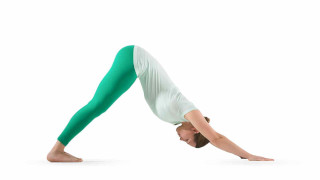

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp

img2 = cv2.imread("/content/YogaPoses/Downdog/00000001.jpg")
cv2_imshow(img2)

image = mp.Image.create_from_file("/content/YogaPoses/Downdog/00000000.jpg")
# 해당 경로에 존재하는 이미지 파일을 불러와서 numpy array의 형태로 저장

detection_result = detector.detect(image) # image detection 후 detection_result.pose_landmark[0]
# list 형태로 저장해서 사용

In [ ]:
detection_result.pose_landmarks[0][0].x
# detection_result.pose_landmarks 중 첫번째 x좌표(nose)에 접근하기 위한 attribute

0.5120550990104675

# Image Augmentation을 위한 opencv 라이브러리 이용 함수 제작

In [ ]:
import time
from tqdm import tqdm
import cv2

In [ ]:
def flip_image(file):
  name = file.split('.')[0]
  image = cv2.imread(file)
  # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변경해주는 기능(openCV 설명 참고)
  rows, cols = image.shape[:2]
  aug_img_H_Flip = cv2.flip(image, 0)
  aug_img_V_Flip = cv2.flip(image, 1)
  aug_img_HV_Flip = cv2.flip(image, -1)
  cv2.imwrite(f'{name}_h.jpg', aug_img_H_Flip)
  cv2.imwrite(f'{name}_v.jpg', aug_img_V_Flip)
  cv2.imwrite(f'{name}_hv.jpg', aug_img_HV_Flip)

In [ ]:
import os

root_path = '/content/YogaPoses'
folder_list = [root_path+'/'+name for name in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, name))]

for folder in folder_list:
  for file in os.listdir(folder): # 해당 dir_path 변수에 대해서 반복문으로 파일 별로 동작하도록 설정
    try:
      flip_image(folder+'/'+file)
    except:
      print("error!")
      break

# 폴더명을 변수로 받는 함수를 만들기 위해 작동 여부 파악
완성된 함수는 아래에 있습니다.

In [ ]:
dir_path = "/content/YogaPoses/Downdog" # 해당 경로는 프로젝트에 맞춰서 변경
data_list = np.zeros(shape=(1,67))  # np.zeros로 새로 만들 numpy array 생성
# def extractor(dir_path):

for file in os.listdir(dir_path): # 해당 dir_path 변수에 대해서 반복문으로 파일 별로 동작하도록 설정
  current_line = np.zeros(shape=(1,67))

  try:
    image = mp.Image.create_from_file(dir_path+'/'+file)
    detection_result = detector.detect(image)

    for i, landmark in enumerate(detection_result.pose_landmarks[0]):
        current_line[0][2*i] = landmark.x
        current_line[0][2*i+1] = landmark.y


  except:
    pass
  data_list = np.concatenate((data_list, current_line), axis=0)
  # 파일 이름과 좌표를 묶어 데이터 리스트에 추가

data_list = data_list[1:] # 처음에 초기화한 열 제거

NameError: ignored

In [ ]:
final_result = pd.DataFrame(data_list)  # numpy에서 dataframe으로 변환
final_result

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.467432,0.721387,0.451402,0.727204,0.449212,0.726345,0.447254,0.725604,0.452272,0.727372,...,0.789835,0.737161,0.834202,0.774989,0.816352,0.755599,0.749761,0.794223,0.738171,0.782075
1,0.478552,0.632514,0.465516,0.647072,0.461669,0.645687,0.458399,0.644428,0.467177,0.649113,...,0.775929,0.690170,0.836827,0.765222,0.799501,0.717614,0.747521,0.780614,0.726607,0.753365
2,0.330343,0.715240,0.311899,0.725620,0.309294,0.723130,0.307268,0.720679,0.313778,0.726830,...,0.649662,0.785344,0.694366,0.834345,0.678350,0.816493,0.603348,0.858883,0.591581,0.840560
3,0.570188,0.749811,0.591219,0.768902,0.594430,0.765818,0.597233,0.761285,0.591591,0.768105,...,0.143210,0.829668,0.149219,0.826536,0.114978,0.876175,0.240467,0.862964,0.217828,0.913790
4,0.531868,0.690247,0.545897,0.708440,0.550106,0.707120,0.554066,0.706347,0.545314,0.709459,...,0.215947,0.813807,0.225542,0.815812,0.185271,0.845476,0.302324,0.840094,0.282053,0.865586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.439827,0.743611,0.423325,0.748603,0.421626,0.747453,0.420093,0.746397,0.423563,0.749026,...,0.732734,0.768150,0.777124,0.803515,0.759046,0.789526,0.701334,0.820784,0.689939,0.807616
192,0.464790,0.792717,0.443894,0.799689,0.441505,0.797897,0.439405,0.795969,0.445781,0.800209,...,0.704816,0.826491,0.705788,0.830821,0.735105,0.843310,0.662294,0.868221,0.669796,0.875526
193,0.414951,0.660337,0.394520,0.667944,0.392143,0.664431,0.390021,0.660691,0.395309,0.669739,...,0.778313,0.726388,0.838110,0.815434,0.806316,0.761011,0.731303,0.853490,0.717125,0.811708
194,0.424429,0.589971,0.410061,0.615600,0.404767,0.615437,0.399333,0.615163,0.417091,0.616422,...,0.829272,0.715189,0.872667,0.742447,0.876680,0.731548,0.759700,0.842971,0.771301,0.823715


In [ ]:
final_result.to_csv("Downdog.csv", index=False) # csv 파일로 저장하기

# 프로토타입을 함수 형태로 제작
윗부분 생략했다면 이부분부터 실행

In [ ]:
def label2num(var): # label을 number로 변환
  if var == 'Downdog':
    return 0
  elif var == 'Goddess':
    return 1
  elif var == 'Plank':
    return 2
  elif var == 'Tree':
    return 3
  elif var == 'Warrior2':
    return 4

def num2label(var): # number를 label로 변환
  if var == 0:
    return 'Downdog'
  elif var == 1:
    return 'Goddess'
  elif var == 2:
    return 'Plank'
  elif var == 3:
    return 'Tree'
  elif var == 4:
    return 'Warrior2'

In [ ]:
def extract_folder(dir_path):
  dir_var = dir_path.split("/")[3]
  csv_file = "_ex_pre.csv"
  save_name = dir_var + csv_file

  data_list = np.zeros(shape=(1,67))
  for file in tqdm(os.listdir(dir_path), leave=True, desc=dir_var): # 해당 dir_path 변수에 대해서 반복문으로 파일 별로 동작하도록 설정
    current_line = np.zeros(shape=(1,67))

    try:
      image = mp.Image.create_from_file(dir_path+'/'+file)
      detection_result = detector.detect(image)

      for i, landmark in enumerate(detection_result.pose_landmarks[0]):
        current_line[0][2*i] = landmark.x
        current_line[0][2*i+1] = landmark.y
      current_line[0][66] = label2num(dir_var)
    except:
      pass

    data_list = np.concatenate((data_list, current_line), axis=0)
    # 파일 이름과 좌표를 묶어 데이터 리스트에 추가

  data_list = data_list[1:] # 처음에 초기화한 열 제거

  df = pd.DataFrame(data_list)  # numpy에서 dataframe으로 변환

  needed_cell = [0, 1 ,
            22, 23, 24, 25,26, 27, 28, 29, 30, 31, 32, 33,
            46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
            66]

  df = df.iloc[:, needed_cell]
  final_result = df[(df.T != 0).any()]

  header = [
    'face.x', 'face.y',
    'right_sh.x', 'right_sh.y',
    'left_sh.x', 'left_sh.y',
    'right_el.x', 'right_el.y',
    'left_el.x', 'left_el.y',
    'right_h.x', 'right_h.y',
    'left_h.x', 'left_h.y',
    'right_pl.x', 'right_pl.y',
    'left_pl.x', 'left_pl.y',
    'right_kn.x', 'right_kn.y',
    'left_kn.x', 'left_kn.y',
    'right_f.x', 'right_f.y',
    'left_f.x', 'left_f.y',
    'ans']

  output_folder = 'preprocessed'
  os.makedirs(output_folder, exist_ok=True)

  output_path = f'/content/{output_folder}/{save_name}'
  # output_path = os.path.join(output_folder, f"modified_{os.path.basename(input_path)}")

  final_result.to_csv(output_path, index=False, header=header) # csv 파일로 저장하기

In [ ]:
extract_folder("/content/YogaPoses/Downdog") # Goddess_extracted.csv 파일로 변환하는 코드
# 아래에서 중복되므로 주석처리하나 아래 반복문 도중 colab이 멈출시 개별로 동작시켜 주세요.

Downdog: 100%|██████████| 784/784 [02:39<00:00,  4.91it/s]


In [ ]:
import os
import pandas as pd

root_path = '/content/YogaPoses'
folder_list = [root_path+'/'+name for name in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, name))]
# root_path 내 존재하는 폴더들을 리스트 형태로 반환

print(folder_list)

['/content/YogaPoses/Plank', '/content/YogaPoses/Tree', '/content/YogaPoses/Warrior2', '/content/YogaPoses/Goddess', '/content/YogaPoses/Downdog']


In [ ]:
for path in folder_list:
  extract_folder(path)

# kaggle에서 받은 /content/YogaPoses내 폴더별로 extractor 함수 실행

Downdog: 100%|██████████| 784/784 [02:37<00:00,  4.98it/s]


# 만든 csv파일 중 필요하다고 생각하는 데이터만 뽑기위해 전처리(생략)
위의 extractor 함수에 포함된 부분입니다. 이해를 위해 남겨두겠습니다.



<img src="https://developers.google.com/static/mediapipe/images/solutions/pose_landmarks_index.png" width="500" height="500"/>

In [ ]:
# 필요한 데이터 셀만 고르기
df_downdog = pd.read_csv('Downdog_extracted.csv')
df_downdog.info

<bound method DataFrame.info of             0         1         2         3         4         5         6  \
0    0.535133  0.353665  0.548365  0.335929  0.552129  0.337882  0.556021   
1    0.382799  0.254161  0.362451  0.260912  0.361803  0.266087  0.360758   
2    0.545923  0.786658  0.566344  0.798700  0.569418  0.796709  0.572215   
3    0.601163  0.266663  0.627571  0.245185  0.630468  0.248375  0.633144   
4    0.367134  0.351508  0.342808  0.354774  0.340831  0.358405  0.338973   
..        ...       ...       ...       ...       ...       ...       ...   
779  0.528955  0.708732  0.516231  0.710771  0.515243  0.708842  0.514268   
780  0.707230  0.326608  0.732040  0.318793  0.739979  0.323595  0.747271   
781  0.402883  0.590914  0.386625  0.595987  0.384700  0.593753  0.382807   
782  0.552469  0.583408  0.572756  0.598714  0.576414  0.596695  0.579648   
783  0.614103  0.233419  0.640152  0.231665  0.641457  0.236163  0.642679   

            7         8         9  ...     

In [ ]:
needed_cell = [0, 1 ,
              22, 23, 24, 25,26, 27, 28, 29, 30, 31, 32, 33,
              46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
              66]
# (0, 1) -> 코의 x,y 좌표
# (22 ~ 33) -> 상체의 관절의 x,y 좌표
# (46 ~  57) -> 하체의 x,y 좌표
# 66 -> 모델의 정답 분류

In [ ]:
df = df_downdog.iloc[:, needed_cell]
df.info

<bound method DataFrame.info of             0         1        22        23        24        25        26  \
0    0.535133  0.353665  0.601560  0.479753  0.585821  0.449455  0.687211   
1    0.382799  0.254161  0.402955  0.415978  0.400444  0.419577  0.300552   
2    0.545923  0.786658  0.587722  0.669221  0.600568  0.661577  0.696892   
3    0.601163  0.266663  0.625417  0.456132  0.638386  0.447829  0.744228   
4    0.367134  0.351508  0.372644  0.464015  0.376404  0.428108  0.281270   
..        ...       ...       ...       ...       ...       ...       ...   
779  0.528955  0.708732  0.535321  0.617709  0.535999  0.609327  0.493949   
780  0.707230  0.326608  0.776049  0.487260  0.626628  0.438619  0.874181   
781  0.402883  0.590914  0.395313  0.484432  0.402078  0.489192  0.334523   
782  0.552469  0.583408  0.589726  0.449885  0.601873  0.426912  0.675119   
783  0.614103  0.233419  0.613250  0.386039  0.622861  0.421071  0.735397   

           27        28        29  ...     

In [ ]:
df = df[(df.T != 0).any()]

In [ ]:
df.info()
# df.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 783
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    float64
 1   1       768 non-null    float64
 2   22      768 non-null    float64
 3   23      768 non-null    float64
 4   24      768 non-null    float64
 5   25      768 non-null    float64
 6   26      768 non-null    float64
 7   27      768 non-null    float64
 8   28      768 non-null    float64
 9   29      768 non-null    float64
 10  30      768 non-null    float64
 11  31      768 non-null    float64
 12  32      768 non-null    float64
 13  33      768 non-null    float64
 14  46      768 non-null    float64
 15  47      768 non-null    float64
 16  48      768 non-null    float64
 17  49      768 non-null    float64
 18  50      768 non-null    float64
 19  51      768 non-null    float64
 20  52      768 non-null    float64
 21  53      768 non-null    float64
 22  54

In [ ]:
type(df_downdog.values)

numpy.ndarray

In [ ]:
def preprocessing(csv_file):
  # 필요한 데이터 셀만 고르기
  df = pd.read_csv(csv_file)
  file = csv_file.split('.')[0]
  save_preprocessed = file + '_pre.csv'
  needed_cell = [0, 1 , # (0, 1) -> 코의 x,y 좌표
              22, 23, 24, 25,26, 27, 28, 29, 30, 31, 32, 33,  # (22 ~ 33) -> 상체의 관절의 x,y 좌표
              46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,  # (46 ~  57) -> 하체의 x,y 좌표
              66]  # 66 -> 모델의 정답 분류

  df = df.iloc[:, needed_cell]
  df = df[(df.T != 0).any()]
  output_folder = 'preprocessed'
  os.makedirs(output_folder, exist_ok=True)

  output_path = f'/content/{output_folder}/{save_preprocessed}'
  # output_path = os.path.join(output_folder, f"modified_{os.path.basename(input_path)}")
  df.to_csv(output_path, index=False)



In [ ]:
# preprocessing('Downdog_extracted.csv')

# 폴더 별로 추출한 csv파일을 하나의 csv파일로 병합

In [ ]:
import os
Dir = r'/content/preprocessed'
fileEx = r'.csv'
csv_list = [file for file in os.listdir(Dir) if file.endswith(fileEx)]
csv_list

['Downdog_ex_pre.csv',
 'Tree_ex_pre.csv',
 'Goddess_ex_pre.csv',
 'Warrior2_ex_pre.csv',
 'Plank_ex_pre.csv']

In [ ]:
# !rm -r /content/preprocessed

In [ ]:
import os
import pandas as pd

# 병합할 CSV 파일들이 있는 폴더 경로
folder_path = "/content/preprocessed"

# 모든 CSV 파일을 저장할 빈 데이터프레임 생성
merged_df = pd.DataFrame()

# 폴더 내의 모든 CSV 파일에 대해 반복
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        # CSV 파일을 데이터프레임으로 읽어와서 기존 데이터프레임에 추가
        df = pd.read_csv(file_path)
        merged_df = pd.concat([merged_df, df], ignore_index=True)

# 병합된 데이터프레임을 새로운 CSV 파일로 저장
output_csv_path = "/content/preprocessed/output_file.csv"
merged_df.to_csv(output_csv_path, index=False)

print(f"모든 CSV 파일이 병합되어 {output_csv_path}에 저장되었습니다.")


모든 CSV 파일이 병합되어 /content/preprocessed/output_file.csv에 저장되었습니다.


In [ ]:
total = pd.read_csv('/content/preprocessed/output_file.csv')
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   face.x      3898 non-null   float64
 1   face.y      3898 non-null   float64
 2   right_sh.x  3898 non-null   float64
 3   right_sh.y  3898 non-null   float64
 4   left_sh.x   3898 non-null   float64
 5   left_sh.y   3898 non-null   float64
 6   right_el.x  3898 non-null   float64
 7   right_el.y  3898 non-null   float64
 8   left_el.x   3898 non-null   float64
 9   left_el.y   3898 non-null   float64
 10  right_h.x   3898 non-null   float64
 11  right_h.y   3898 non-null   float64
 12  left_h.x    3898 non-null   float64
 13  left_h.y    3898 non-null   float64
 14  right_pl.x  3898 non-null   float64
 15  right_pl.y  3898 non-null   float64
 16  left_pl.x   3898 non-null   float64
 17  left_pl.y   3898 non-null   float64
 18  right_kn.x  3898 non-null   float64
 19  right_kn.y  3898 non-null  

# PyTorch로 MLP 모델 구현

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# 사용자 정의 데이터셋 클래스
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)  # 분류 문제의 경우, torch.long으로 설정

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 데이터 불러오기 및 모델 파리미터 조정

In [ ]:
# 데이터 불러오기
csv_path = "/content/preprocessed/output_file.csv"
df = pd.read_csv(csv_path)

# 특성과 레이블 분리
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 데이터 정규화
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 설정
input_size = X_train.shape[1]
hidden_size = 32
output_size = len(set(y))  # 클래스 수에 따라 설정
learning_rate = 0.005
batch_size = 8
num_epochs = 50

# 모델, 손실 함수, 옵티마이저 초기화
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류의 경우, CrossEntropyLoss 사용
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 데이터로더 생성
train_dataset = CustomDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = CustomDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



# 모델 학습 및 그래프 그리기

In [ ]:
# Lists to store training loss and test accuracy for plotting
train_losses = []
test_losses = []
test_accuracies = []

# 모델 훈련
for epoch in range(num_epochs):
  model.train()
  total_train_loss = 0.0

  for inputs, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    total_train_loss += loss.item()

  # 훈련 손실 기록
  average_train_loss = total_train_loss / len(train_loader)
  train_losses.append(average_train_loss)

  # 테스트 데이터로 모델 평가
  test_dataset = CustomDataset(X_test, y_test)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  model.eval()
  total_test_loss = 0.0
  all_labels = []
  all_preds = []
  with torch.no_grad():
    for inputs, labels in test_loader:
      outputs = model(inputs)
      test_loss = criterion(outputs, labels)
      total_test_loss += test_loss.item()

      preds = torch.argmax(outputs, 1)
      all_labels.extend(labels.cpu().numpy())
      all_preds.extend(preds.cpu().numpy())

    average_test_loss = total_test_loss / len(test_loader)
    test_losses.append(average_test_loss)

    accuracy = (torch.tensor(all_labels) == torch.tensor(all_preds)).float().mean().item()
    test_accuracies.append(accuracy)

    accuracy = (torch.tensor(all_labels) == torch.tensor(all_preds)).float().mean().item()
    test_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {average_train_loss:.4f}, Test Loss: {average_test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch [1/50], Train Loss: 1.2549, Test Loss: 0.8693, Test Accuracy: 0.7615
Epoch [2/50], Train Loss: 0.7374, Test Loss: 0.5500, Test Accuracy: 0.8000
Epoch [3/50], Train Loss: 0.5152, Test Loss: 0.4227, Test Accuracy: 0.8179
Epoch [4/50], Train Loss: 0.4333, Test Loss: 0.3582, Test Accuracy: 0.8628
Epoch [5/50], Train Loss: 0.3902, Test Loss: 0.3253, Test Accuracy: 0.8897
Epoch [6/50], Train Loss: 0.3524, Test Loss: 0.3846, Test Accuracy: 0.8064
Epoch [7/50], Train Loss: 0.3251, Test Loss: 0.2866, Test Accuracy: 0.8987
Epoch [8/50], Train Loss: 0.3028, Test Loss: 0.2738, Test Accuracy: 0.9128
Epoch [9/50], Train Loss: 0.2797, Test Loss: 0.2873, Test Accuracy: 0.8949
Epoch [10/50], Train Loss: 0.2675, Test Loss: 0.2651, Test Accuracy: 0.9090
Epoch [11/50], Train Loss: 0.2519, Test Loss: 0.2470, Test Accuracy: 0.9154
Epoch [12/50], Train Loss: 0.2373, Test Loss: 0.2305, Test Accuracy: 0.9192
Epoch [13/50], Train Loss: 0.2250, Test Loss: 0.2230, Test Accuracy: 0.9256
Epoch [14/50], Train 

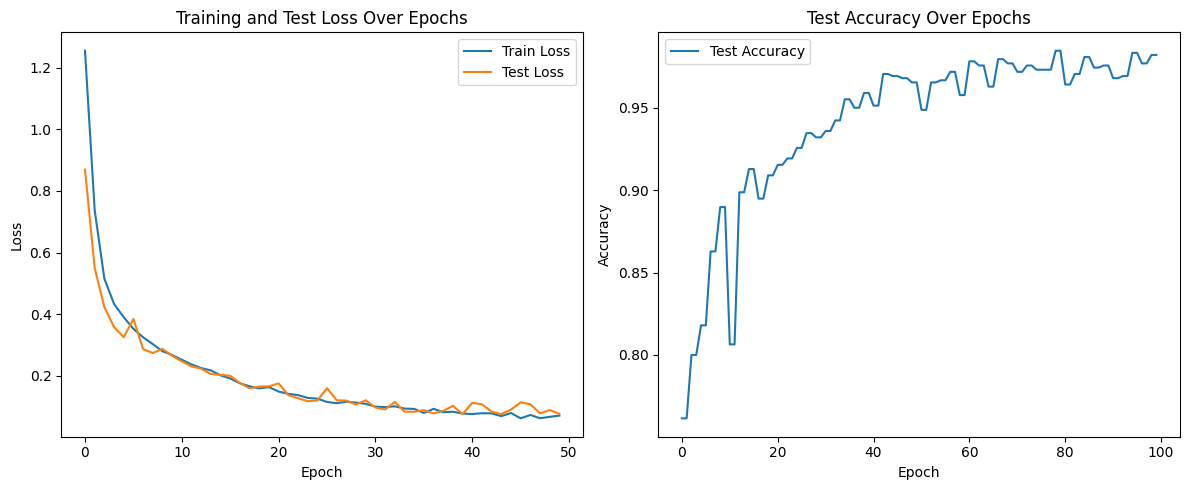

In [ ]:
# 손실 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 이미지 인식부터 tensor로 전환 및 모델 예측 후 softmax까지 한번에 진행하는 함수 제작

In [ ]:
def predict():
  uploaded = files.upload()
  for filename, content in uploaded.items():
    image_file = filename # 파일 업로드 후 해당 파일명을 image_file 변수로 입력

  current_line = np.zeros(shape=(1,66))
  cv_image = cv2.imread(image_file)
  cv_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변경해주는 기능(openCV 설명 참고)
  # image = cv2.resize(cv_image, (640, 480))
  rows, cols = cv_image.shape[:2]

  try:
    image = mp.Image.create_from_file(image_file)
    detection_result = detector.detect(image)

    for i, landmark in enumerate(detection_result.pose_landmarks[0]):
        current_line[0][2*i] = landmark.x
        current_line[0][2*i+1] = landmark.y

  except:
    print('Cannot read this image. try another one.')
    pass
  df = pd.DataFrame(current_line)

  needed_cell = [0, 1 , # (0, 1) -> 코의 x,y 좌표
              22, 23, 24, 25,26, 27, 28, 29, 30, 31, 32, 33,  # (22 ~ 33) -> 상체의 관절의 x,y 좌표
              46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]  # (46 ~  57) -> 하체의 x,y 좌표

  df = df.iloc[:, needed_cell]
  data = torch.tensor(df.values, dtype=torch.float32)

  print(data)
  output = model(data)
  output = torch.argmax(output, 1)
  pred = output.item()
  label = num2label(pred)

  plt.figure(figsize=(6, 6))
  plt.axis('off')
  plt.imshow(cv_image)

  print(f'This is a {label} pose!')


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import cv2

Saving warriror2.jpg to warriror2.jpg
tensor([[0.5628, 0.1501, 0.5692, 0.2736, 0.4487, 0.2560, 0.6772, 0.2460, 0.3406,
         0.2467, 0.7725, 0.2332, 0.2381, 0.2431, 0.5316, 0.6128, 0.4615, 0.6099,
         0.6802, 0.6431, 0.3395, 0.7609, 0.6855, 0.8946, 0.2193, 0.9076]])
This is a Warrior2 pose!


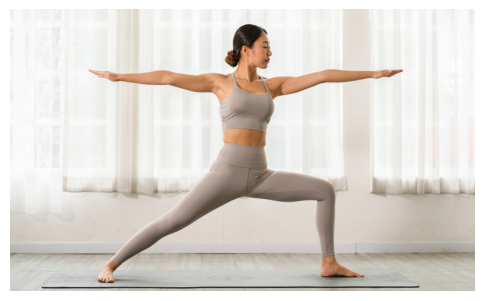

In [ ]:
predict()